In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import mlflow

In [2]:
df=pd.read_csv('/gpfswork/rech/owt/commun/galaxy_classification/2023-sfh-galaxy-classification/data/binned_SFHs/binned_SFHs-11levels-JWST_z_0.5-1.0.txt',sep='\t')
df

,id_L19,z,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,...,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,bins_7,bins_8,bins_9,bins_10
0,1.0,0.999855,0.939681,0.765723,1.040326,0.653183,0.681013,0.876748,1.087066,1.334943,...,30.0,53.0,94.0,167.0,296.0,525.0,931.0,1650.0,2925.0,5185.0
1,2.0,0.999877,0.620013,0.681315,0.847025,0.771318,0.604645,0.606996,1.038095,1.255895,...,30.0,53.0,93.0,164.0,289.0,508.0,895.0,1577.0,2777.0,4890.0
2,3.0,0.999962,0.179263,0.353490,0.193751,0.228442,0.215671,0.247727,0.232897,0.361108,...,30.0,52.0,92.0,160.0,280.0,489.0,856.0,1495.0,2614.0,4569.0
3,4.0,0.999992,0.957090,0.891500,0.686737,0.756981,1.007660,1.165234,1.343500,1.957630,...,30.0,53.0,94.0,165.0,292.0,516.0,912.0,1611.0,2847.0,5029.0
4,5.0,0.999904,0.085287,0.109160,0.125521,0.104615,0.100381,0.158273,0.192622,0.174321,...,30.0,53.0,93.0,165.0,290.0,512.0,903.0,1594.0,2811.0,4958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91365,96083.0,0.500094,1.458885,1.263207,1.180912,0.986489,1.385861,1.535868,1.734626,1.248427,...,30.0,56.0,103.0,190.0,352.0,652.0,1206.0,2233.0,4133.0,7650.0
91366,96084.0,0.500007,2.232033,1.801724,2.332847,2.174740,2.182127,2.159274,2.861361,4.188978,...,30.0,55.0,103.0,190.0,351.0,650.0,1202.0,2223.0,4113.0,7608.0
91367,96085.0,0.500002,0.173875,0.000000,0.160250,0.175548,0.256810,0.209051,0.209495,0.246817,...,30.0,55.0,101.0,185.0,338.0,620.0,1136.0,2081.0,3813.0,6987.0
91368,96087.0,0.500022,0.595233,0.311524,0.606744,0.398483,0.594600,0.652902,0.571577,0.659411,...,30.0,54.0,99.0,180.0,326.0,592.0,1074.0,1950.0,3541.0,6429.0


In [3]:
levels=df.columns[2:12]
SFH_lev=df[levels].values

Euclidean k-means
7.121 --> 5.054 --> 4.975 --> 4.952 --> 4.941 --> 4.930 --> 4.916 --> 4.898 --> 4.873 --> 4.846 --> 4.822 --> 4.803 --> 4.790 --> 4.780 --> 4.773 --> 4.768 --> 4.765 --> 4.762 --> 4.760 --> 4.758 --> 4.757 --> 4.757 --> 4.756 --> 4.756 --> 4.756 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 4.755 --> 


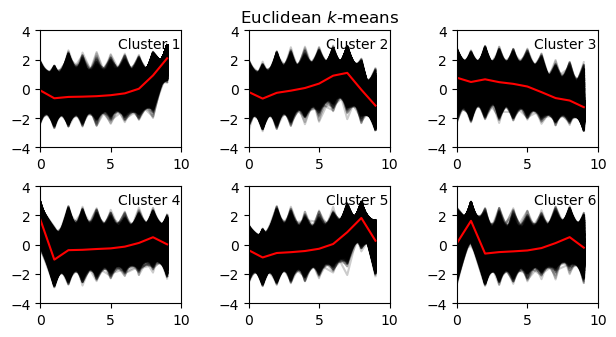

In [4]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train = SFH_lev
#X_train = X_train[y_train < 4]  # Keep first 3 classes
#numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=6, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(6):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")


plt.tight_layout()
plt.show()

In [5]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5])

In [6]:
df_cluster = pd.DataFrame()

In [7]:
df_cluster['ID'] = df['id_L19'].astype(int)
df_cluster['cluster'] = y_pred

df_cluster.head()

,ID,cluster
0,1,0
1,2,1
2,3,5
3,4,4
4,5,0


In [8]:
#df_cluster.to_csv('df_cluster_euclidean_3_lev11.txt')

In [9]:
data=Table.read('/gpfswork/rech/owt/commun/galaxy_classification/2023-sfh-galaxy-classification/data/Horizon_AGN-COSMOS_like/HorizonAGN_COSMOS-Web_v2.0_witherr.fits')
df_photometry=data.to_pandas()

In [10]:
pd.set_option('display.max_columns', None)

df_photometry = df_photometry.merge(df_cluster, on= 'ID')
df_photometry.head()

,ID,HSTF814W_FLUX_noerr,HSTF814W_FLUX,HSTF814W_FLUXERR,HSTF814W_MAG_noerr,HSTF814W_MAG,HSTF814W_MAGERR,F444W_FLUX_noerr,F444W_FLUX,F444W_FLUXERR,F444W_MAG_noerr,F444W_MAG,F444W_MAGERR,F115W_FLUX_noerr,F115W_FLUX,F115W_FLUXERR,F115W_MAG_noerr,F115W_MAG,F115W_MAGERR,F150W_FLUX_noerr,F150W_FLUX,F150W_FLUXERR,F150W_MAG_noerr,F150W_MAG,F150W_MAGERR,F277W_FLUX_noerr,F277W_FLUX,F277W_FLUXERR,F277W_MAG_noerr,F277W_MAG,F277W_MAGERR,F770W_FLUX_noerr,F770W_FLUX,F770W_FLUXERR,F770W_MAG_noerr,F770W_MAG,F770W_MAGERR,u_FLUX_noerr,u_FLUX,u_FLUXERR,u_MAG_noerr,u_MAG,u_MAGERR,gHSC_FLUX_noerr,gHSC_FLUX,gHSC_FLUXERR,gHSC_MAG_noerr,gHSC_MAG,gHSC_MAGERR,rHSC_FLUX_noerr,rHSC_FLUX,rHSC_FLUXERR,rHSC_MAG_noerr,rHSC_MAG,rHSC_MAGERR,iHSC_FLUX_noerr,iHSC_FLUX,iHSC_FLUXERR,iHSC_MAG_noerr,iHSC_MAG,iHSC_MAGERR,zHSC_FLUX_noerr,zHSC_FLUX,zHSC_FLUXERR,zHSC_MAG_noerr,zHSC_MAG,zHSC_MAGERR,yHSC_FLUX_noerr,yHSC_FLUX,yHSC_FLUXERR,yHSC_MAG_noerr,yHSC_MAG,yHSC_MAGERR,Y_FLUX_noerr,Y_FLUX,Y_FLUXERR,Y_MAG_noerr,Y_MAG,Y_MAGERR,Ks_FLUX_noerr,Ks_FLUX,Ks_FLUXERR,Ks_MAG_noerr,Ks_MAG,Ks_MAGERR,H_FLUX_noerr,H_FLUX,H_FLUXERR,H_MAG_noerr,H_MAG,H_MAGERR,J_FLUX_noerr,J_FLUX,J_FLUXERR,J_MAG_noerr,J_MAG,J_MAGERR,IB427_FLUX_noerr,IB427_FLUX,IB427_FLUXERR,IB427_MAG_noerr,IB427_MAG,IB427_MAGERR,IB467_FLUX_noerr,IB467_FLUX,IB467_FLUXERR,IB467_MAG_noerr,IB467_MAG,IB467_MAGERR,IB484_FLUX_noerr,IB484_FLUX,IB484_FLUXERR,IB484_MAG_noerr,IB484_MAG,IB484_MAGERR,IB505_FLUX_noerr,IB505_FLUX,IB505_FLUXERR,IB505_MAG_noerr,IB505_MAG,IB505_MAGERR,IB527_FLUX_noerr,IB527_FLUX,IB527_FLUXERR,IB527_MAG_noerr,IB527_MAG,IB527_MAGERR,IB574_FLUX_noerr,IB574_FLUX,IB574_FLUXERR,IB574_MAG_noerr,IB574_MAG,IB574_MAGERR,IB624_FLUX_noerr,IB624_FLUX,IB624_FLUXERR,IB624_MAG_noerr,IB624_MAG,IB624_MAGERR,IB679_FLUX_noerr,IB679_FLUX,IB679_FLUXERR,IB679_MAG_noerr,IB679_MAG,IB679_MAGERR,IB709_FLUX_noerr,IB709_FLUX,IB709_FLUXERR,IB709_MAG_noerr,IB709_MAG,IB709_MAGERR,IB738_FLUX_noerr,IB738_FLUX,IB738_FLUXERR,IB738_MAG_noerr,IB738_MAG,IB738_MAGERR,IB767_FLUX_noerr,IB767_FLUX,IB767_FLUXERR,IB767_MAG_noerr,IB767_MAG,IB767_MAGERR,IB827_FLUX_noerr,IB827_FLUX,IB827_FLUXERR,IB827_MAG_noerr,IB827_MAG,IB827_MAGERR,NB711_FLUX_noerr,NB711_FLUX,NB711_FLUXERR,NB711_MAG_noerr,NB711_MAG,NB711_MAGERR,NB816_FLUX_noerr,NB816_FLUX,NB816_FLUXERR,NB816_MAG_noerr,NB816_MAG,NB816_MAGERR,B_FLUX_noerr,B_FLUX,B_FLUXERR,B_MAG_noerr,B_MAG,B_MAGERR,V_FLUX_noerr,V_FLUX,V_FLUXERR,V_MAG_noerr,V_MAG,V_MAGERR,r_FLUX_noerr,r_FLUX,r_FLUXERR,r_MAG_noerr,r_MAG,r_MAGERR,ip_FLUX_noerr,ip_FLUX,ip_FLUXERR,ip_MAG_noerr,ip_MAG,ip_MAGERR,zpp_FLUX_noerr,zpp_FLUX,zpp_FLUXERR,zpp_MAG_noerr,zpp_MAG,zpp_MAGERR,ch1_FLUX_noerr,ch1_FLUX,ch1_FLUXERR,ch1_MAG_noerr,ch1_MAG,ch1_MAGERR,ch2_FLUX_noerr,ch2_FLUX,ch2_FLUXERR,ch2_MAG_noerr,ch2_MAG,ch2_MAGERR,NUV_FLUX_noerr,NUV_FLUX,NUV_FLUXERR,NUV_MAG_noerr,NUV_MAG,NUV_MAGERR,FUV_FLUX_noerr,FUV_FLUX,FUV_FLUXERR,FUV_MAG_noerr,FUV_MAG,FUV_MAGERR,cluster
0,1,0.629078,0.636226,0.013549,24.403238,24.390972,0.023128,4.343880,4.334220,0.021323,22.305305,22.307723,0.005343,2.434124,2.427549,0.016763,22.934143,22.937080,0.007499,3.259036,3.257389,0.019149,22.617277,22.617826,0.006384,5.136729,5.135544,0.022891,22.123283,22.123534,0.004841,1.991247,2.057662,0.121936,23.152187,23.116565,0.064356,0.284884,0.286727,0.013853,25.263329,25.256330,0.052468,0.314802,0.320382,0.012715,25.154905,25.135828,0.043099,0.498854,0.500087,0.011542,24.655066,24.652387,0.025065,0.962943,0.960387,0.013483,23.940998,23.943884,0.015247,1.650744,1.640276,0.027827,23.355801,23.362707,0.018424,1.961151,1.948152,0.030966,23.168722,23.175943,0.017262,2.029479,1.964291,0.064325,23.131538,23.166985,0.035563,4.630707,4.498899,0.138177,22.235882,22.267234,0.033355,3.615213,3.582190,0.144569,22.504665,22.514629,0.043829,2.695403,2.662646,0.105893,22.823441,22.836716,0.043190,0.285221,0.254946,0.020746,25.262047,25.383880,0.088370,0.284288,0.196832,0.076527,25.265604,25.664760,0.422231,0.303421,0.312712,0.030961,25.194885,25.162140,0.107524,0.324252,0.257366,0.059349,25.122793,

In [11]:
df_magnitude = df_photometry[['ID','u_MAG', 'gHSC_MAG','rHSC_MAG', 'iHSC_MAG','zHSC_MAG','cluster']]
df_flux = df_photometry[['ID','u_FLUX', 'gHSC_FLUX','rHSC_FLUX','iHSC_FLUX','zHSC_FLUX', 'cluster']]

In [12]:
df_magnitude.head()

,ID,u_MAG,gHSC_MAG,rHSC_MAG,iHSC_MAG,zHSC_MAG,cluster
0,1,25.256330,25.135828,24.652387,23.943884,23.362707,0
1,2,25.608875,25.433839,24.989253,24.285662,23.761995,1
2,3,25.836970,25.975482,25.925041,25.193421,24.759748,5
3,4,24.996950,24.935638,24.477681,23.782817,23.229884,4
4,5,27.699570,27.261439,26.956020,26.073994,25.487756,0


In [13]:
df_flux.head()

,ID,u_FLUX,gHSC_FLUX,rHSC_FLUX,iHSC_FLUX,zHSC_FLUX,cluster
0,1,0.286727,0.320382,0.500087,0.960387,1.640276,0
1,2,0.207229,0.243481,0.366690,0.701027,1.135539,1
2,3,0.167962,0.147845,0.154876,0.303831,0.453003,5
3,4,0.364099,0.385252,0.587391,1.113969,1.853730,4
4,5,0.030211,0.045230,0.059923,0.135021,0.231685,0


In [14]:
df_magnitude_noerr = df_photometry[['ID','u_MAG_noerr', 'gHSC_MAG_noerr','rHSC_MAG_noerr','iHSC_MAG_noerr','zHSC_MAG_noerr','cluster']]
df_flux_noerr = df_photometry[['ID','u_FLUX_noerr','gHSC_FLUX_noerr','rHSC_FLUX_noerr','iHSC_FLUX_noerr','zHSC_FLUX_noerr', 'cluster']]

In [15]:
df_magnitude_noerr.head()

,ID,u_MAG_noerr,gHSC_MAG_noerr,rHSC_MAG_noerr,iHSC_MAG_noerr,zHSC_MAG_noerr,cluster
0,1,25.263329,25.154905,24.655066,23.940998,23.355801,0
1,2,25.552471,25.459475,24.998421,24.279184,23.759457,1
2,3,25.911186,25.935917,25.780342,25.227812,24.785313,5
3,4,25.002691,24.921156,24.494930,23.786884,23.223497,4
4,5,27.342621,27.245632,26.783840,25.999836,25.416460,0


In [16]:
df_flux_noerr.head()

,ID,u_FLUX_noerr,gHSC_FLUX_noerr,rHSC_FLUX_noerr,iHSC_FLUX_noerr,zHSC_FLUX_noerr,cluster
0,1,0.284884,0.314802,0.498854,0.962943,1.650744,0
1,2,0.218279,0.237799,0.363607,0.705223,1.138197,1
2,3,0.156865,0.153332,0.176955,0.294358,0.442461,5
3,4,0.362179,0.390425,0.578133,1.109804,1.864666,4
4,5,0.041971,0.045893,0.070221,0.144566,0.247409,0


In [17]:
for i in df_magnitude.columns[1:-1]:
	print("Mean Value of "+i+":\t"+str(df_magnitude[i].mean()))

print('\n')
for i in df_magnitude_noerr.columns[1:-1]:
	print("Mean Value of "+i+":\t"+str(df_magnitude_noerr[i].mean()))
print('\n')

for i in df_flux.columns[1:-1]:
	print("Mean Value of "+i+":\t"+str(df_flux[i].mean()))
print('\n')

for i in df_flux_noerr.columns[1:-1]:
	print("Mean Value of "+i+":\t"+str(df_flux_noerr[i].mean()))

Mean Value of u_MAG:	25.430429787791546
Mean Value of gHSC_MAG:	25.126303420810267
Mean Value of rHSC_MAG:	24.428529412427118
Mean Value of iHSC_MAG:	23.610042310773682
Mean Value of zHSC_MAG:	23.274081265255848


Mean Value of u_MAG_noerr:	25.466856219364853
Mean Value of gHSC_MAG_noerr:	25.125697952450867
Mean Value of rHSC_MAG_noerr:	24.427725916429644
Mean Value of iHSC_MAG_noerr:	23.609862993613394
Mean Value of zHSC_MAG_noerr:	23.273797592350125


Mean Value of u_FLUX:	0.41460028820352873
Mean Value of gHSC_FLUX:	0.5853064904936105
Mean Value of rHSC_FLUX:	1.2088974189475858
Mean Value of iHSC_FLUX:	2.559505877842634
Mean Value of zHSC_FLUX:	3.4443551895475655


Mean Value of u_FLUX_noerr:	0.4146539496213487
Mean Value of gHSC_FLUX_noerr:	0.5853117492026111
Mean Value of rHSC_FLUX_noerr:	1.2088721451687339
Mean Value of iHSC_FLUX_noerr:	2.559460775065834
Mean Value of zHSC_FLUX_noerr:	3.4443515475701143


In [18]:
#Verify number of nan values per column
for i in df_flux.columns:
    print(df_flux[i].isnull().sum())

0
0
0
0
0
0
0


In [19]:
#Verify number of nan values per column
for i in df_flux_noerr.columns:
    print(df_flux_noerr[i].isnull().sum())

0
0
0
0
0
0
0


In [20]:
#Verify number of nan values per column
for i in df_magnitude.columns:
    print(df_magnitude[i].isnull().sum())

0
1039
43
0
0
0
0


In [21]:
#Verify number of nan values per column
for i in df_magnitude_noerr.columns:
    print(df_magnitude_noerr[i].isnull().sum())

0
0
0
0
0
0
0


In [22]:
features  = df_flux[["u_FLUX","gHSC_FLUX","rHSC_FLUX","iHSC_FLUX","zHSC_FLUX"]]
features_noerr = df_flux_noerr[["u_FLUX_noerr","gHSC_FLUX_noerr","rHSC_FLUX_noerr","iHSC_FLUX_noerr","zHSC_FLUX_noerr"]]

In [23]:
labels = df_flux["cluster"]
labels_noerr = df_flux_noerr["cluster"]

In [24]:
# save dataset
features.to_pickle("features.df")
labels.to_pickle("labels.df")

In [36]:
import mlflow
mlflow.set_tracking_uri("file:/gpfsscratch/rech/owt/commun/galaxy_classification/mlruns")
mlflow.set_experiment("classifier")

<Experiment: artifact_location='file:///gpfsscratch/rech/owt/commun/galaxy_classification/mlruns/192005154444247140', creation_time=1688651319481, experiment_id='192005154444247140', last_update_time=1688651319481, lifecycle_stage='active', name='classifier', tags={}>

2023/07/07 15:10:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/rapids-23.04/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/r

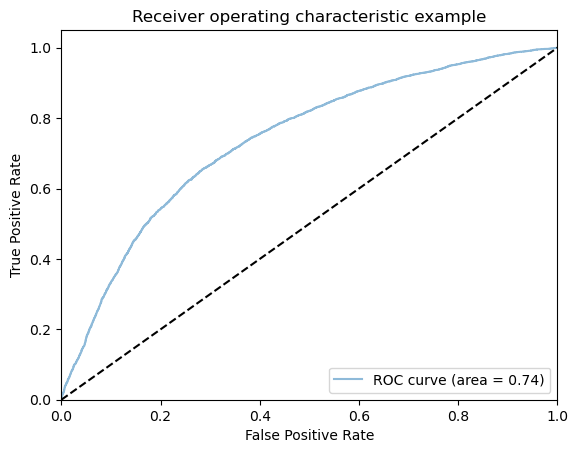

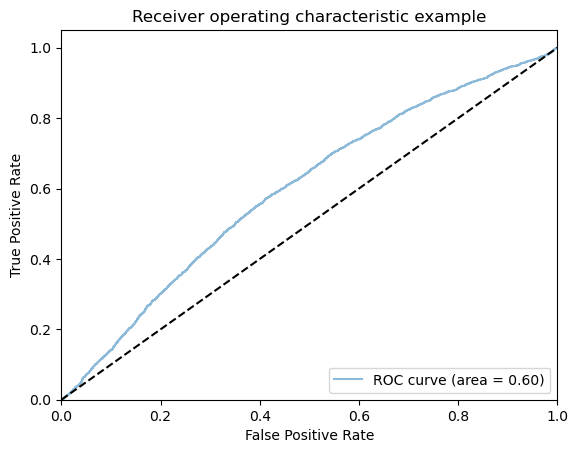

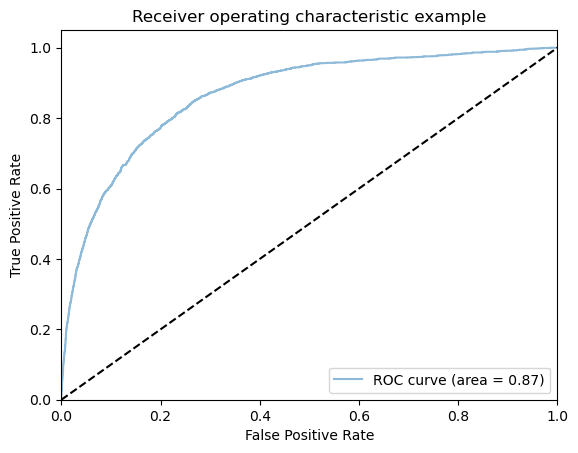

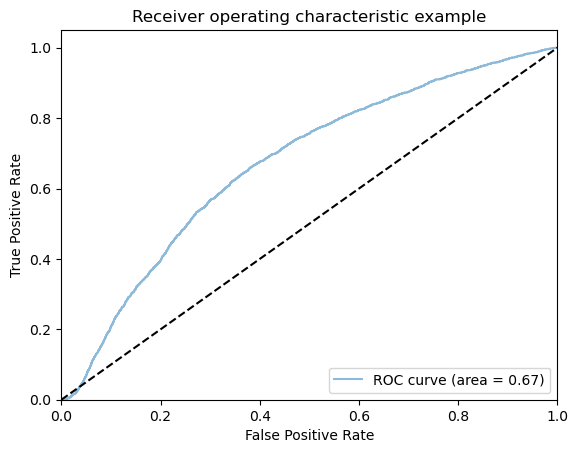

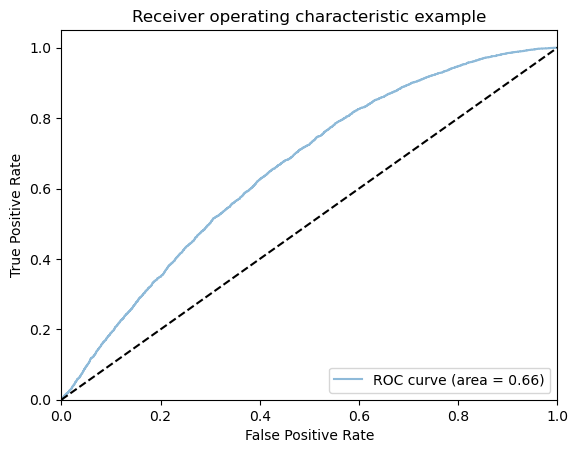

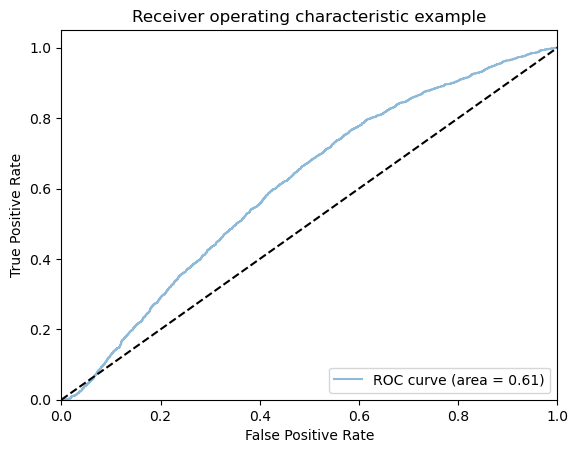

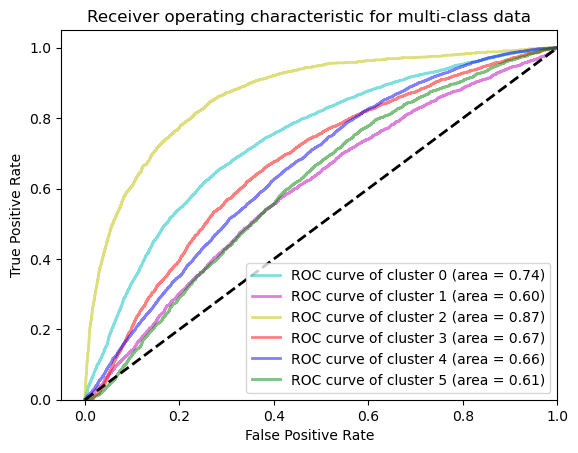

In [41]:
mlflow.start_run(run_name="SVM")
mlflow.autolog()

from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from itertools import cycle

target = label_binarize(labels,
                        classes=[0,1,2,3,4,5])
train_features, test_features, train_labels, test_labels = train_test_split(features, target, stratify=target, test_size = 0.2, random_state = 42)
train_features, val_features, train_labels, val_labels = train_test_split(features, target, test_size = 0.2, random_state = 42)


classifier = OneVsRestClassifier(LinearSVC( random_state=0))
y_score = classifier.fit(train_features, train_labels).decision_function(test_features)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(6):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i], alpha=0.5)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig('ROC_clusters_'+str(i)+'.png')
    mlflow.log_artifact('ROC_clusters_'+str(i)+'.png')
    plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['c', 'm', 'y', 'r', 'b', 'g'])
for i, color in zip(range(6), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of cluster {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]), alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.savefig('ROC_6_clusters.png')
mlflow.log_artifact('ROC_6_clusters.png')
plt.show()
mlflow.end_run()

